In [1]:
import rbo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv("RBO-Role-tdtype.csv")

In [3]:
ar_rank=data[data['ROLES']=='ARCHITECT']
te_rank=data[data['ROLES']=='TECHNICAL']
ma_rank=data[data['ROLES']=='MANAGEMENT']

In [5]:
roles=['ARCHITECT','TECHNICAL','MANAGEMENT']
p_values=np.arange(0.5, 0.98, 0.01)

In [6]:
rboDF=pd.DataFrame(columns = ['roles' , 'p', 'RBO'])
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            for p_val in p_values:
                #print(countries[i]+"-"+countries[j]+","+str(p))
                rbo_ext=rbo.rbo(data[data['ROLES']==roles[i]]['TDTYPE'], data[data['ROLES']==roles[j]]['TDTYPE'], p=p_val)
                #rboDF=rboDF.append({'Countries':'CO-CHI','p':0.5,'RBO':99},ignore_index=True)
                rboDF=rboDF.append({'roles':roles[i]+"-"+roles[j],'p':p_val,'RBO':rbo_ext['ext']},ignore_index=True)
            
        

In [7]:
rbo_ext=rbo.rbo(data[data['ROLES']==roles[0]]['TDTYPE'], data[data['ROLES']==roles[1]]['TDTYPE'], p=0.95)
rbo_ext

{'min': 0.6238755391434437,
 'res': 0.3609579862813531,
 'ext': 0.9106100011512318}

In [8]:
rboDF.sample(10)

,roles,p,RBO
5,TECHNICAL-ARCHITECT,0.55,0.987488
39,TECHNICAL-ARCHITECT,0.89,0.950592
139,MANAGEMENT-TECHNICAL,0.93,0.937079
61,MANAGEMENT-ARCHITECT,0.63,0.975565
30,TECHNICAL-ARCHITECT,0.80,0.966602
100,MANAGEMENT-TECHNICAL,0.54,0.996760
89,MANAGEMENT-ARCHITECT,0.91,0.903941
143,MANAGEMENT-TECHNICAL,0.97,0.908597
115,MANAGEMENT-TECHNICAL,0.69,0.987376
62,MANAGEMENT-ARCHITECT,0.64,0.974184


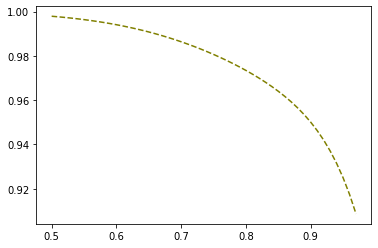

In [9]:
plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']=='MANAGEMENT-TECHNICAL'], color='olive', linestyle='dashed', label=roles[i]+"-"+roles[j])

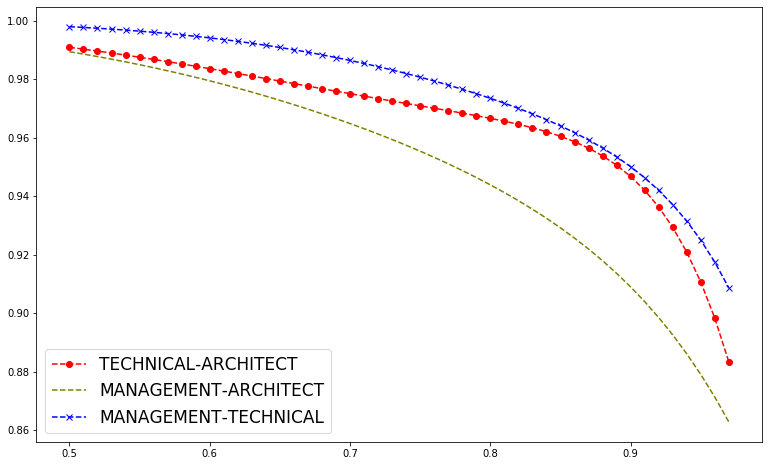

In [10]:
colors=['red','olive','blue','black','green','orange']
markers=['o','','x','o','','x']
plt.figure(figsize=(13,8))
count=0
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            
            pair=roles[i]+"-"+roles[j]
            plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']==pair], marker=markers[count], color=colors[count]
                     , linestyle='dashed', label=pair)
            count=count+1
plt.legend(prop={'size': 17})


In [ ]:
rbo.rbo(ma_rank['CAUSE'], ar_rank['CAUSE'], p=.85)